In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

import dataretrieval.nwis as nwis

In [2]:
site  = "13311000"
# get basic info about the site
df3 = nwis.get_record(sites=site, service='site')

print(df3.columns)
dec_lat_va=df3['dec_lat_va'][0]
dec_long_va=df3['dec_long_va'][0]
station_nm=df3['station_nm'][0]
alt_va =df3['alt_va'][0] 
drain_area_va=df3['drain_area_va'][0] 

#print(station_nm)
print(df3[['alt_va', 'alt_meth_cd', 'alt_acy_va', 'drain_area_va', 'contrib_drain_area_va']])

Index(['agency_cd', 'site_no', 'station_nm', 'site_tp_cd', 'lat_va', 'long_va',
       'dec_lat_va', 'dec_long_va', 'coord_meth_cd', 'coord_acy_cd',
       'coord_datum_cd', 'dec_coord_datum_cd', 'district_cd', 'state_cd',
       'county_cd', 'country_cd', 'land_net_ds', 'map_nm', 'map_scale_fc',
       'alt_va', 'alt_meth_cd', 'alt_acy_va', 'alt_datum_cd', 'huc_cd',
       'basin_cd', 'topo_cd', 'instruments_cd', 'construction_dt',
       'inventory_dt', 'drain_area_va', 'contrib_drain_area_va', 'tz_cd',
       'local_time_fg', 'reliability_cd', 'gw_file_cd', 'nat_aqfr_cd',
       'aqfr_cd', 'aqfr_type_cd', 'well_depth_va', 'hole_depth_va',
       'depth_src_cd', 'project_no'],
      dtype='object')
   alt_va alt_meth_cd  alt_acy_va  drain_area_va  contrib_drain_area_va
0    6466           N         4.3           19.3                    NaN


In [3]:
path=  r"../data_prep/prism_df_summer_" +site +".csv"  # os.path.join( r"../data_prep/prism_df_summer_",  site ,".csv" )

data=pd.read_csv( path )  

print(data)
print(data.columns)

      Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0             34  2012-06-01      0.00               0.8                9.3   
1             35  2012-06-02      0.68               1.8               11.9   
2             36  2012-06-03      3.33               3.1               10.7   
3             37  2012-06-04      0.00               3.7               11.4   
4             38  2012-06-05      0.88               1.9               13.3   
...          ...         ...       ...               ...                ...   
1004        2477  2023-08-27      2.48               6.5               15.5   
1005        2478  2023-08-28      0.00               8.2               16.7   
1006        2479  2023-08-29      0.00               7.1               16.9   
1007        2480  2023-08-30      2.63               6.2               15.7   
1008        2481  2023-08-31      0.00               2.7                9.0   

      tmax..degrees.C.  tdmean..degrees.C.  vpdmin.

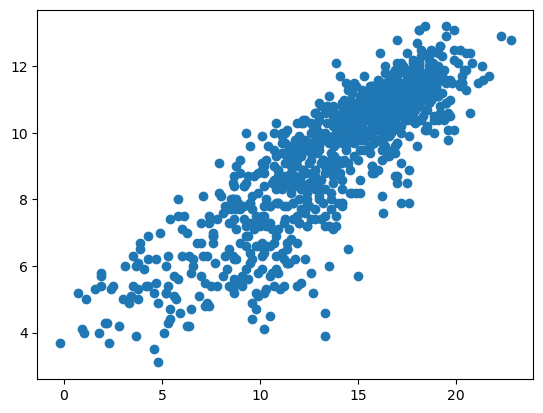

In [4]:
plt.scatter(data['tmean..degrees.C.'],data['X_00010_00003'])

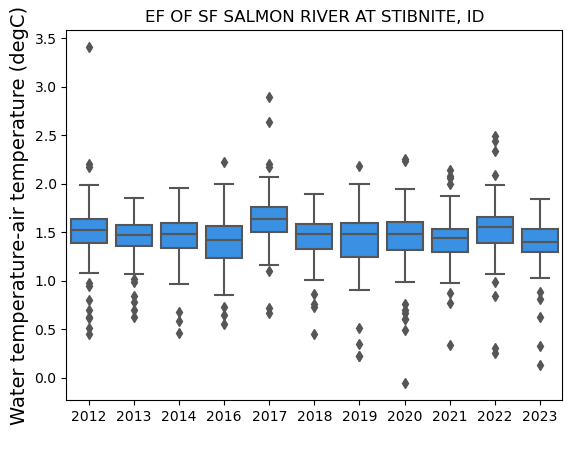

In [6]:
data['diff']=data['tmean..degrees.C.']-data['X_00010_00003']



ax=sns.boxplot(x="yr", y="diff", data=data , color="dodgerblue")
ax.set_ylabel( "Water temperature-air temperature (degC)" , fontsize=14 #, color="red"
             )
ax.set_xlabel( " " , fontsize=14 #, color="red"
             )
ax.set_title( station_nm)
plt.show()

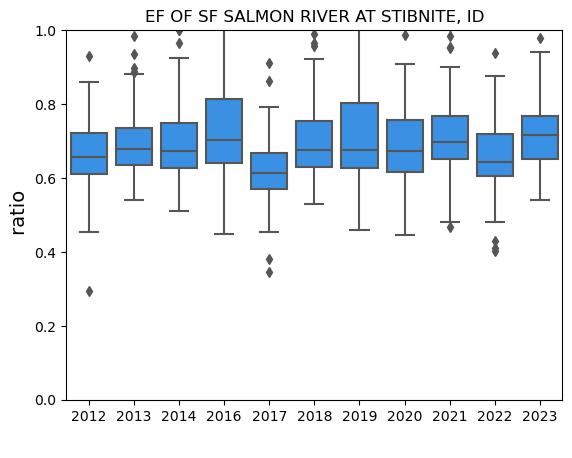

In [10]:
data['ratio']= data['X_00010_00003']/data['tmean..degrees.C.']

ax=sns.boxplot(x="yr", y="ratio", data=data , color="dodgerblue" ) 
ax.set_ylabel( " ratio" , fontsize=14 #, color="red"
             )
ax.set_xlabel( " " , fontsize=14 #, color="red"
             )
ax.set_title( station_nm)
ax.set(ylim=(0, 1))
plt.show()

In [20]:
ratio_annual=data.groupby('yr').agg(avg_value1=('ratio', 'median') )
ratio_annual

,avg_value1
yr,
2012,0.656527
2013,0.678560
2014,0.674235
2016,0.703947
2017,0.612702
2018,0.676760
2019,0.674774
2020,0.673042
2021,0.696167


In [21]:
data['ratio'].median()

0.6716417910447761